# BFSI-Credit Risk Assignment

### Importing all necessary libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Step1: Reading & Understanding the Data

In [2]:
main= pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/main_loan_base.csv")
monthly = pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/monthly_balance_base.csv")
repayment = pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/repayment_base.csv")
test = pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/test_base.csv")
main= pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/test_main_loan_base.csv")
monthly = pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/test_monthly_balance_base.csv")
repayment = pd.read_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/test_repayment_base.csv")

In [3]:
main.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
462,LN82982235,Shanaya Mand,"H.No. 89, Shankar Road\nCuttack 045268",Consumer-Durable,24975,2112.90,0,2,13,95,4,10.6,640.65,2015-09-27,2016-07-01
8308,LN75899409,Parinaaz Kuruvilla,"79, Virk Circle, Dibrugarh-364212",Consumer-Durable,20527,3644.98,7,3,9,72,2,12.9,974.93,2019-04-09,2020-11-24
340,LN43567065,Chirag Ahluwalia,"16/37, Verma Zila, Bahraich 536156",Consumer-Durable,5634,1537.41,2,3,13,16,2,11.5,263.90,2019-03-19,2020-01-04
3757,LN55844681,Anaya Gola,"H.No. 31\nSawhney Zila, Ozhukarai 929770",Car,1931372,444563.64,2,1,5,72,1,9.4,169259.80,2019-01-22,2019-09-29
6744,LN65529928,Piya Yogi,25/233\nBhagat Nagar\nGhaziabad-795856,Car,1550019,104669.38,7,4,3,15,1,14.3,139390.63,2013-10-17,2014-05-20


In [4]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   customer_name      10000 non-null  object 
 2   customer_address   10000 non-null  object 
 3   loan_type          10000 non-null  object 
 4   loan_amount        10000 non-null  int64  
 5   collateral_value   10000 non-null  float64
 6   cheque_bounces     10000 non-null  int64  
 7   number_of_loans    10000 non-null  int64  
 8   missed_repayments  10000 non-null  int64  
 9   vintage_in_months  10000 non-null  int64  
 10  tenure_years       10000 non-null  int64  
 11  interest           10000 non-null  float64
 12  monthly_emi        10000 non-null  float64
 13  disbursal_date     10000 non-null  object 
 14  default_date       10000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB


In [5]:
# Checking the number of rows and columns uploaded
main.shape

(10000, 15)

In [6]:
main['disbursal_date']= pd.to_datetime (main['disbursal_date'], infer_datetime_format=True)
main['default_date']=pd.to_datetime (main['default_date'], infer_datetime_format=True)

In [7]:
## Creating new data sets with zero duplicates
main= main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(9997, 15)


In [8]:
repayment.sample(5)

,loan_acc_num,repayment_amount,repayment_date
336,LN97279529,8401.69,2021-03-31
5773,LN61345073,74745.52,2019-09-23
68197,LN57350649,540.43,2018-09-24
113881,LN57603215,7488.59,2016-12-26
71965,LN33457192,10064.07,2020-12-22


In [9]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125860 entries, 0 to 125859
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      125860 non-null  object 
 1   repayment_amount  125860 non-null  float64
 2   repayment_date    125860 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [10]:
repayment['loan_acc_num'].nunique()

9229

In [11]:
repayment=round(repayment.groupby('loan_acc_num')["repayment_amount"].sum(),2)
repayment= pd.DataFrame({'loan_acc_num': repayment.index,"repayment_amount": repayment.values})
repayment.head

<bound method NDFrame.head of      loan_acc_num  repayment_amount
0      LN10011015           1725.31
1      LN10028091           3560.31
2      LN10033713          11582.17
3      LN10045654          66181.74
4      LN10051605          87664.41
...           ...               ...
9224   LN99908769           5424.06
9225   LN99928119          38873.70
9226   LN99974867           5196.10
9227   LN99986307         230017.78
9228   LN99996397         551610.64

[9229 rows x 2 columns]>

In [12]:
test.sample(5)

,loan_acc_num,average_monthly_balance,balance_amount
2,LN47897912,90238.372478,90239.743540
22,LN40576221,24264.959274,23518.132370
26,LN28524209,166.536514,168.615830
21,LN69604180,11.290584,11.144856
4,LN28938244,43134.691847,39631.359437


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_acc_num             50 non-null     object 
 1   average_monthly_balance  50 non-null     float64
 2   balance_amount           50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [14]:
main.shape

(9997, 15)

In [15]:
repayment.shape

(9229, 2)

In [16]:
df=pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [17]:
df.shape

(9997, 16)

In [18]:
#deriving the target
df['target']= (df['loan_amount']- (df['collateral_value']+df ['repayment_amount']))/df['loan_amount']

In [19]:
df.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
8166,LN61686073,Inaaya Ahluwalia,"773, Srivastava Ganj\nChennai-773837",Consumer-Durable,9493,1994.88,3,3,8,119,2,14.6,458.48,2020-03-09,2021-04-15,2292.40,0.548375
5954,LN46516211,Shlok Sami,986\nChopra Path\nChandigarh 641124,Car,1256709,30914.60,2,3,14,29,2,9.8,57874.81,2012-06-08,2013-10-08,115749.62,0.883295
5262,LN29001487,Fateh Ganesh,"622, Chauhan Zila\nPondicherry 324723",Car,630917,179323.76,2,2,14,45,3,11.9,20925.35,2016-10-26,2017-07-21,62776.05,0.616273
2208,LN62098575,Pari Walia,H.No. 545\nDara Marg\nMango-073297,Consumer-Durable,4841,981.41,1,3,8,82,3,14.2,165.92,2017-10-26,2019-09-12,1718.82,0.442216
7680,LN37432740,Jayan Warrior,43/860\nChander Street\nSurendranagar Dudhrej-...,Personal,8798,1023.82,0,1,4,168,5,14.0,204.71,2021-02-10,2023-03-15,6818.71,0.108601


In [20]:
df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
target               768
dtype: int64

In [21]:
#df['repayment_date']=df['repayment_date'].fillna(df['repayment_date'].mode()[0])

In [22]:
#null value imputation
df['repayment_amount']=df['repayment_amount'].fillna(0)

In [23]:
#null value imputation
df['target']=df['target'].fillna(df['target'].mean())

In [24]:
### creating new variable: feature engineering
df['due']= df['loan_amount']-df['repayment_amount']

In [25]:
monthly.sample(5)

,loan_acc_num,date,balance_amount
393426,LN36787794,2012-12-14,9587.774322
435621,LN94285068,2012-08-04,277.266539
349546,LN81065523,2020-07-14,12361.336984
703030,LN85364914,2014-10-16,154.572805
372991,LN36506785,2008-02-24,2525.239862


In [26]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801407 entries, 0 to 801406
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_acc_num    801407 non-null  object 
 1   date            801407 non-null  object 
 2   balance_amount  801407 non-null  float64
dtypes: float64(1), object(2)
memory usage: 18.3+ MB


In [27]:
monthly['loan_acc_num'].nunique()

9940

In [28]:
monthly =round(monthly.groupby('loan_acc_num')["balance_amount"].mean(),2)
monthly= pd.DataFrame({'loan_acc_num': monthly.index,"average_monthly_balance": monthly.values})
monthly.head

<bound method NDFrame.head of      loan_acc_num  average_monthly_balance
0      LN10011015                    25.09
1      LN10028091                    62.53
2      LN10033713                   182.41
3      LN10045654                  1838.35
4      LN10051605                  3374.17
...           ...                      ...
9935   LN99908769                  1064.34
9936   LN99928119                  4369.90
9937   LN99974867                   306.88
9938   LN99986307                  2683.98
9939   LN99996397                 43639.25

[9940 rows x 2 columns]>

In [29]:
## merge the datasets
data= pd.merge(
      left=df,
       right=monthly,
       left_on='loan_acc_num',
        right_on='loan_acc_num',
        how= 'left'
)

In [30]:
data.shape

(9997, 19)

In [31]:
data.isnull().sum()

loan_acc_num                0
customer_name               0
customer_address            0
loan_type                   0
loan_amount                 0
collateral_value            0
cheque_bounces              0
number_of_loans             0
missed_repayments           0
vintage_in_months           0
tenure_years                0
interest                    0
monthly_emi                 0
disbursal_date              0
default_date                0
repayment_amount            0
target                      0
due                         0
average_monthly_balance    57
dtype: int64

In [32]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9.997000e+03,9940.000000
mean,3.826299e+05,57776.537838,1.759328,1.499150,9.715815,80.117935,2.986796,11.513084,16629.970895,1.535564e+05,0.421251,2.290735e+05,7697.630115
std,5.006302e+05,93164.284871,1.782236,1.260301,7.672178,43.608729,1.414223,2.012132,26407.489352,2.550241e+05,0.221010,3.407302e+05,15492.918208
min,2.009000e+03,1.160000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,45.520000,0.000000e+00,-0.477009,-2.820818e+04,1.590000
25%,2.405500e+04,3336.050000,0.000000,0.000000,4.000000,45.000000,2.000000,9.800000,1160.130000,6.919730e+03,0.243582,1.607327e+04,434.717500
50%,1.961680e+05,20340.880000,1.000000,1.000000,8.000000,79.000000,3.000000,11.500000,6678.880000,4.984556e+04,0.421251,9.674972e+04,2226.135000
75%,4.348480e+05,64181.200000,3.000000,2.000000,14.000000,112.000000,4.000000,13.200000,19562.710000,1.677589e+05,0.600085,2.579702e+05,7573.685000
max,1.998735e+06,591419.920000,10.000000,6.000000,35.000000,235.000000,5.000000,15.000000,177491.690000,1.772722e+06,0.894842,1.991734e+06,222997.610000


In [33]:
## Dropping the recordes with negative LGD
data= data.drop(data[data['target']<0].index)

In [34]:
## EDA

In [35]:
## separating numeric and categorical features
numeric_data=data.select_dtypes(include=[np.number])
categorical_data= data.select_dtypes(exclude=[np.number])

In [36]:
## Top 10 correlated features
def get_redundant_pairs(df):
    '''get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop=set()
    cols=df.columns
    for i in range (0, df.shape[1]):
        for j in range (0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
            return pairs_to_drop
def get_top_abs_correlations(df, n=10):
    au_corr= df.corr().abs().unstack()
    return au_corr[0:n]
print ('Top Absolute Correlations')
print(get_top_abs_correlations(numeric_data, 10))

Top Absolute Correlations
loan_amount  loan_amount          1.000000
             collateral_value     0.814197
             cheque_bounces       0.009099
             number_of_loans      0.006511
             missed_repayments    0.000239
             vintage_in_months    0.000635
             tenure_years         0.003702
             interest             0.014171
             monthly_emi          0.818050
             repayment_amount     0.781666
dtype: float64


In [37]:
from statistics import mean
print('Average mothly EMI:', round(mean(data['monthly_emi']),2))
print('Average repayment amount:', round(mean(data['repayment_amount']),2))
print('Average loan amount:', round(mean(data['loan_amount']),2))

Average mothly EMI: 16593.52
Average repayment amount: 153173.81
Average loan amount: 382640.42


In [38]:
## UNIVARIATE ANALYSIS

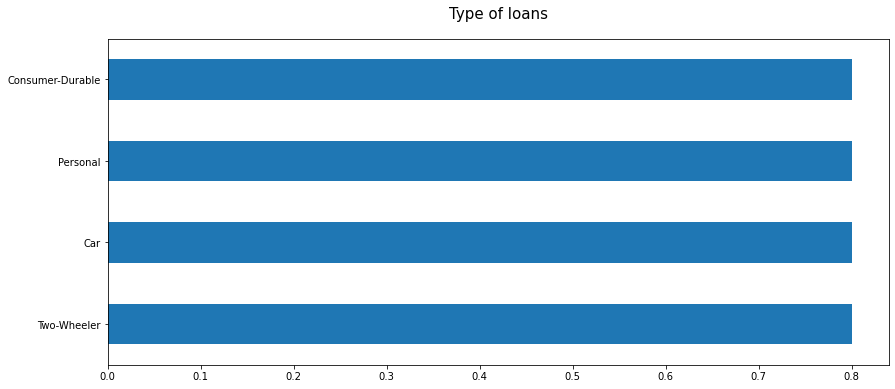

In [39]:
# Checking the % of loan type in the entire dataset
plt.figure(figsize = (14,6))
data['loan_type'].value_counts().plot.barh(WIDTH=.8)
plt.title('Type of loans', fontdict={'fontsize' : 15}, pad=20)
plt.show()

In [40]:
def Uni_Analysis_Numerical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25,5))
    plt.subplot (1,3,1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    plt.subplot (1,3,2)
    sns.distplot(dataframe[column].dropna()).set(title='Dist Plot')
    plt.show()

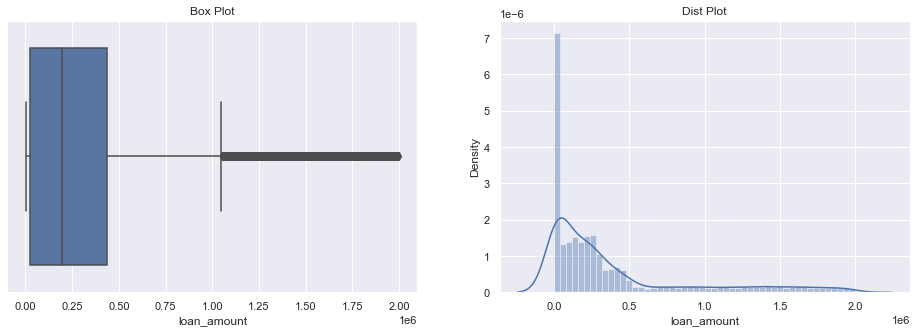

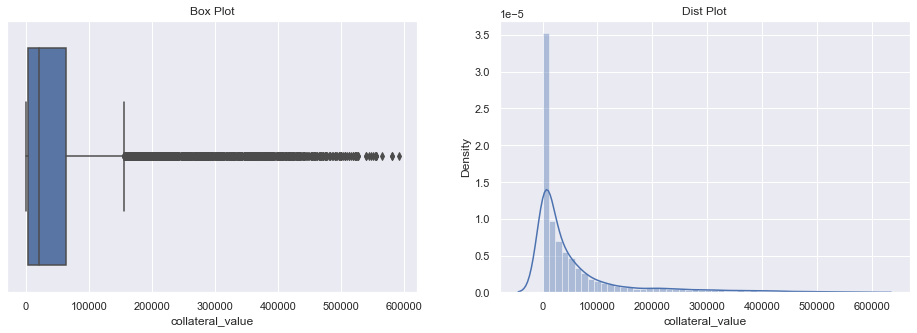

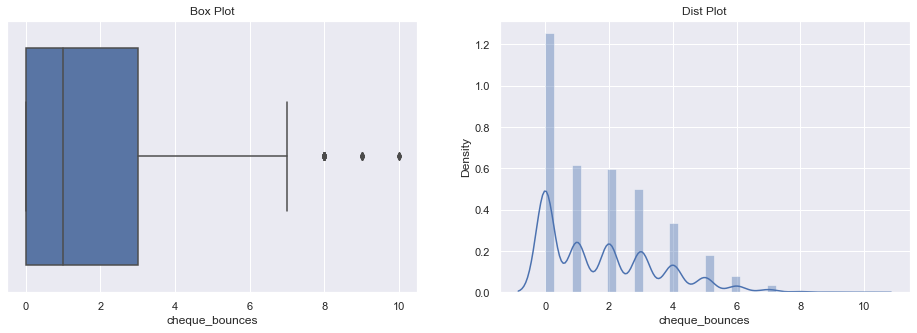

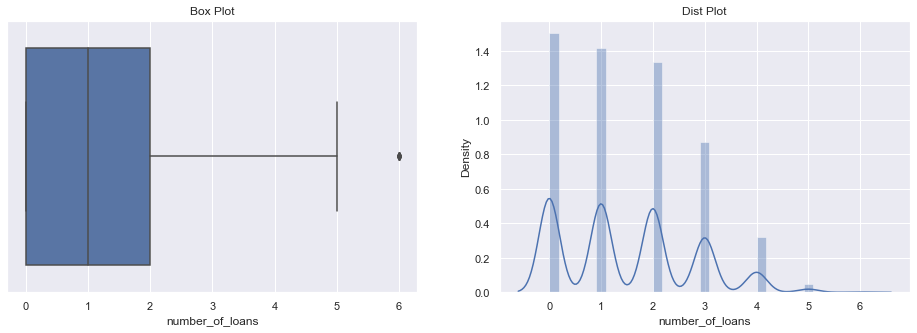

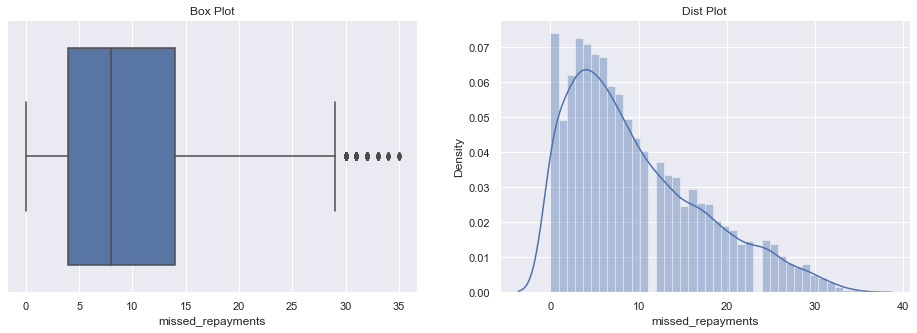

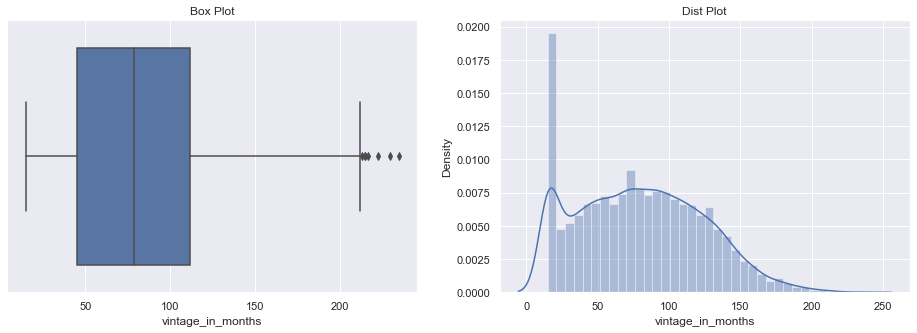

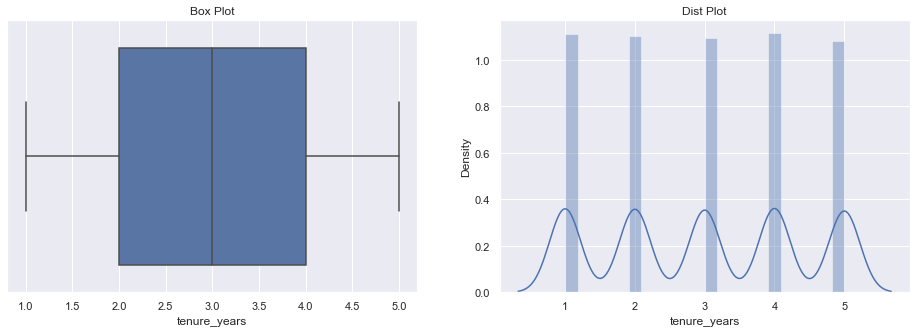

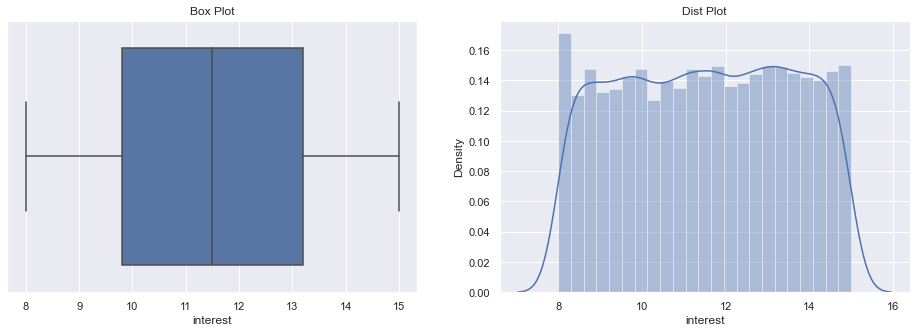

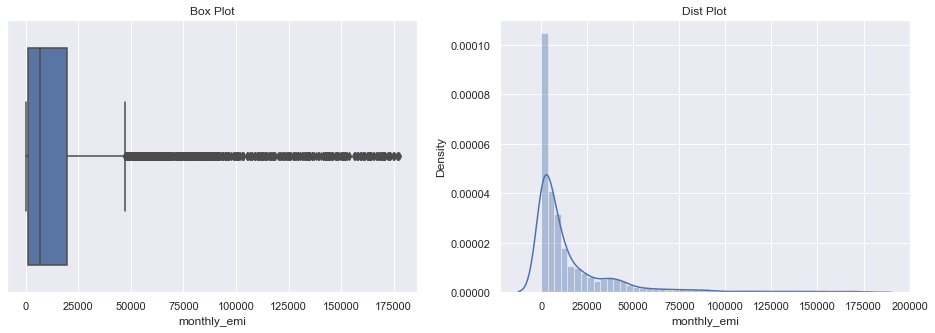

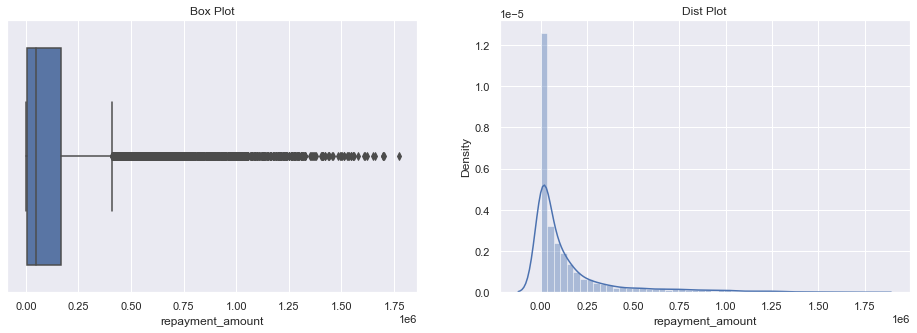

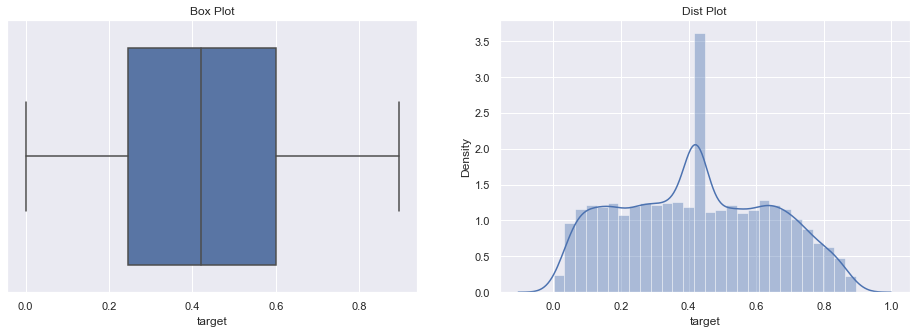

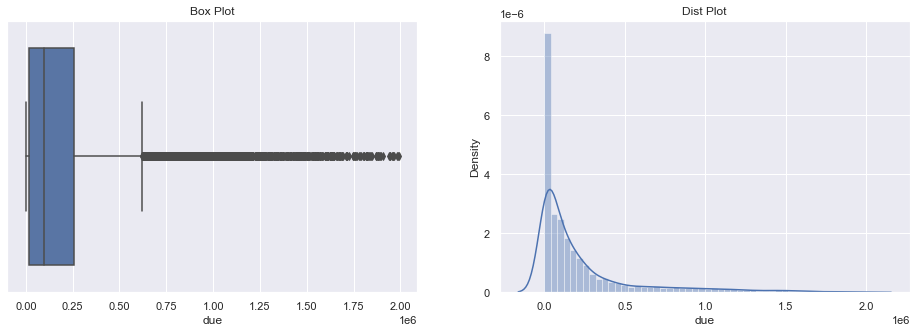

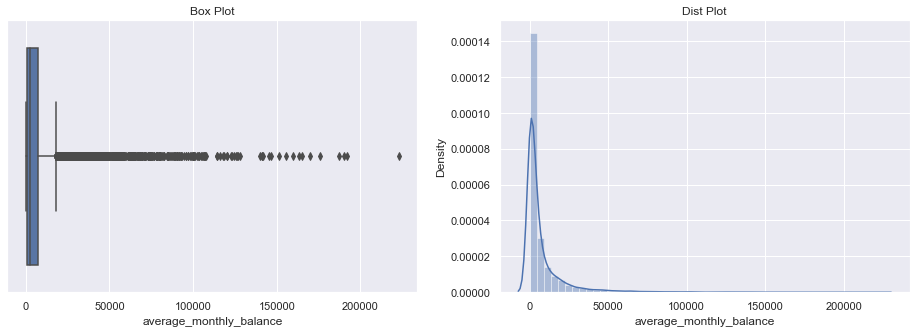

In [41]:
#distribution of the numerical feature
for i in numeric_data:
    Uni_Analysis_Numerical(data,i)

<AxesSubplot:xlabel='loan_amount', ylabel='repayment_amount'>

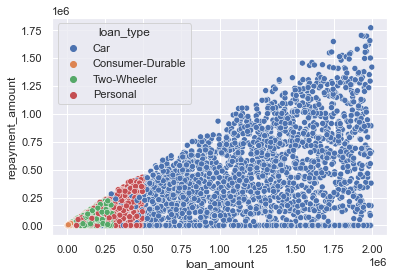

In [42]:
sns.scatterplot(x=data.loan_amount,
               y= data.repayment_amount,
               data=data, hue="loan_type")

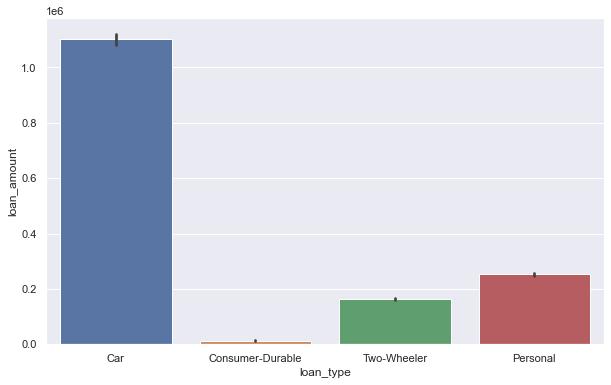

In [43]:
plt.figure(figsize=[10,6])
sns.set(style='darkgrid')
sns.barplot(x=data.loan_type,y=data.loan_amount)
plt.show()

In [44]:
##Data preparation : variable trandformation, feature engineering

In [45]:
## separating numeric and categorocal features
numeric_data=data.select_dtypes(include=[np.number])
categorical_data=data.select_dtypes(exclude=[np.number])

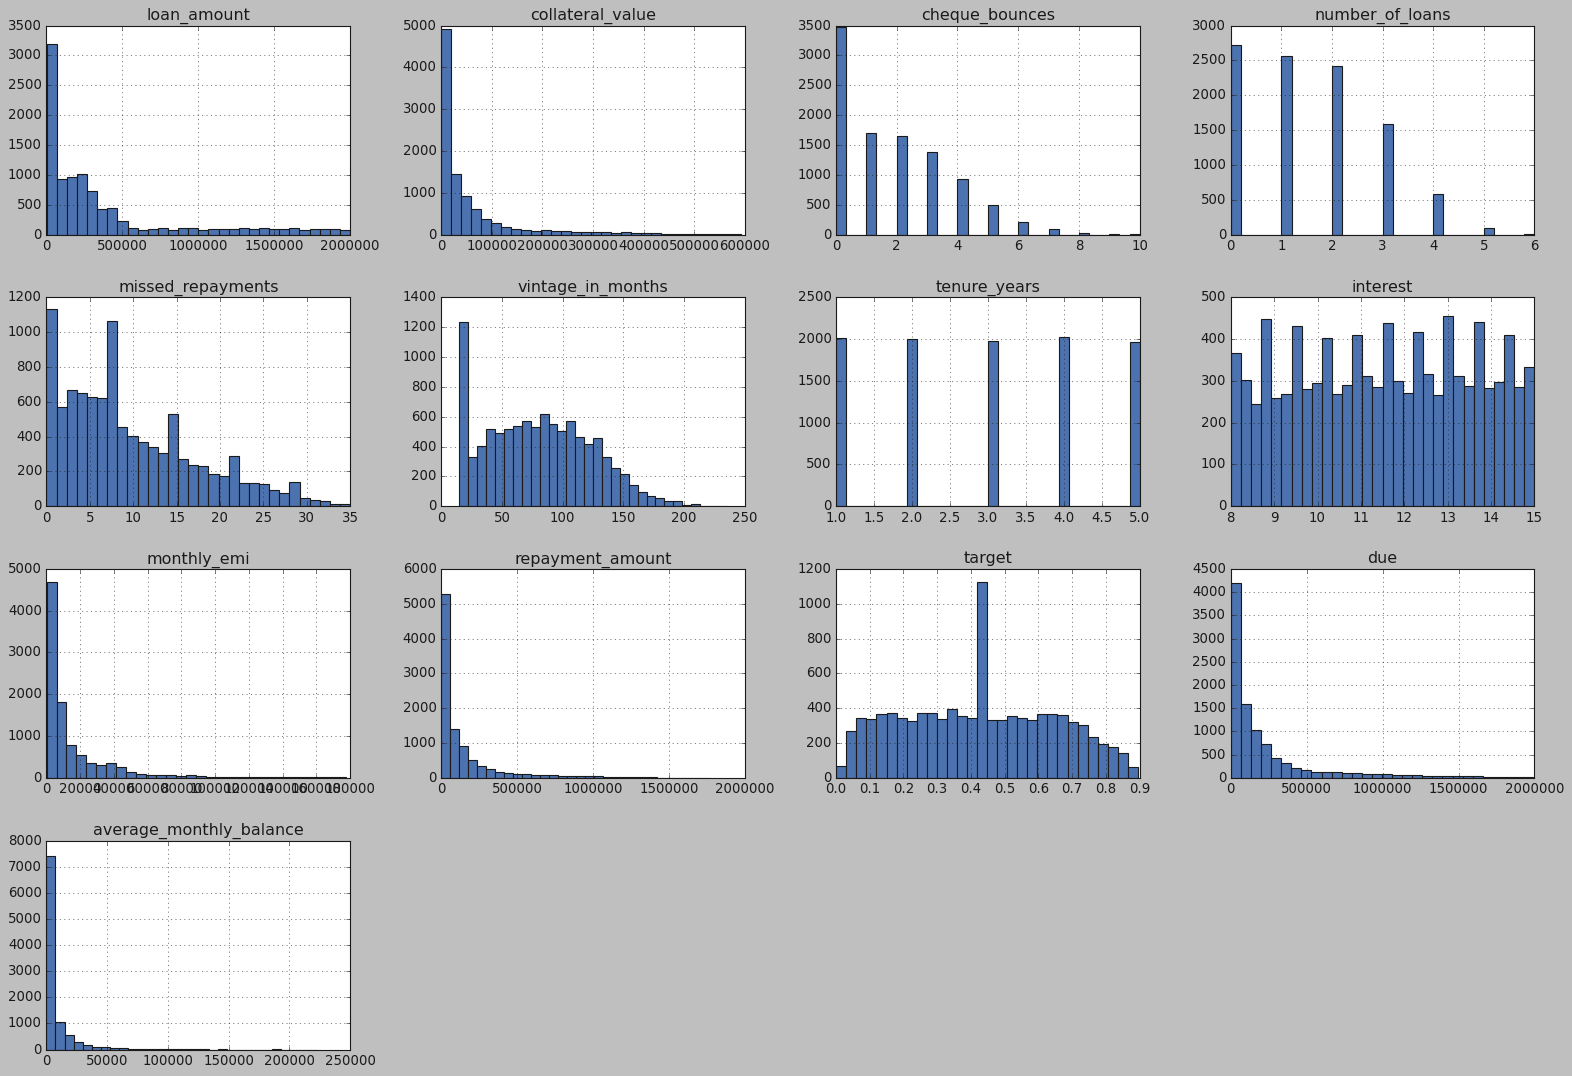

In [46]:
#plt.figure(figsize=(24,24))
plt.style.use('classic')
data[numeric_data.columns].hist(bins=30, figsize=(24,16))
plt.show()

In [47]:
numeric_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<AxesSubplot:>

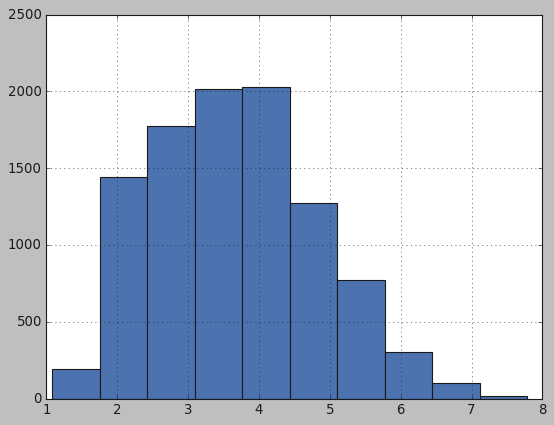

In [48]:
(data['average_monthly_balance']**(1/6)).hist()

<AxesSubplot:>

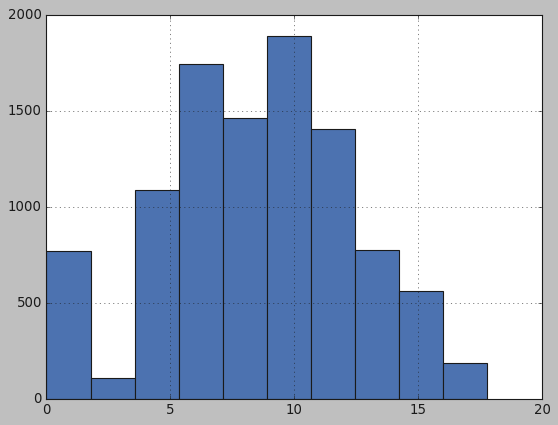

In [49]:
(data['repayment_amount']**(1/5)).hist()

In [50]:

data['loan_amount']= data['loan_amount']**(1/5)

In [51]:
data['collateral_value']= data['collateral_value']**(1/5)

In [52]:
data['cheque_bounces']= data['cheque_bounces']**(1/2)

In [53]:
data['missed_repayments']= data['missed_repayments']**(1/2)

In [54]:
data['vintage_in_months']= data['vintage_in_months']**(1/2)

In [55]:
data['monthly_emi']= data['monthly_emi']**(1/6)

In [56]:
data['repayment_amount']= data['repayment_amount']**(1/5)

In [57]:
data['average_monthly_balance']= data['average_monthly_balance']**(1/6)

<AxesSubplot:>

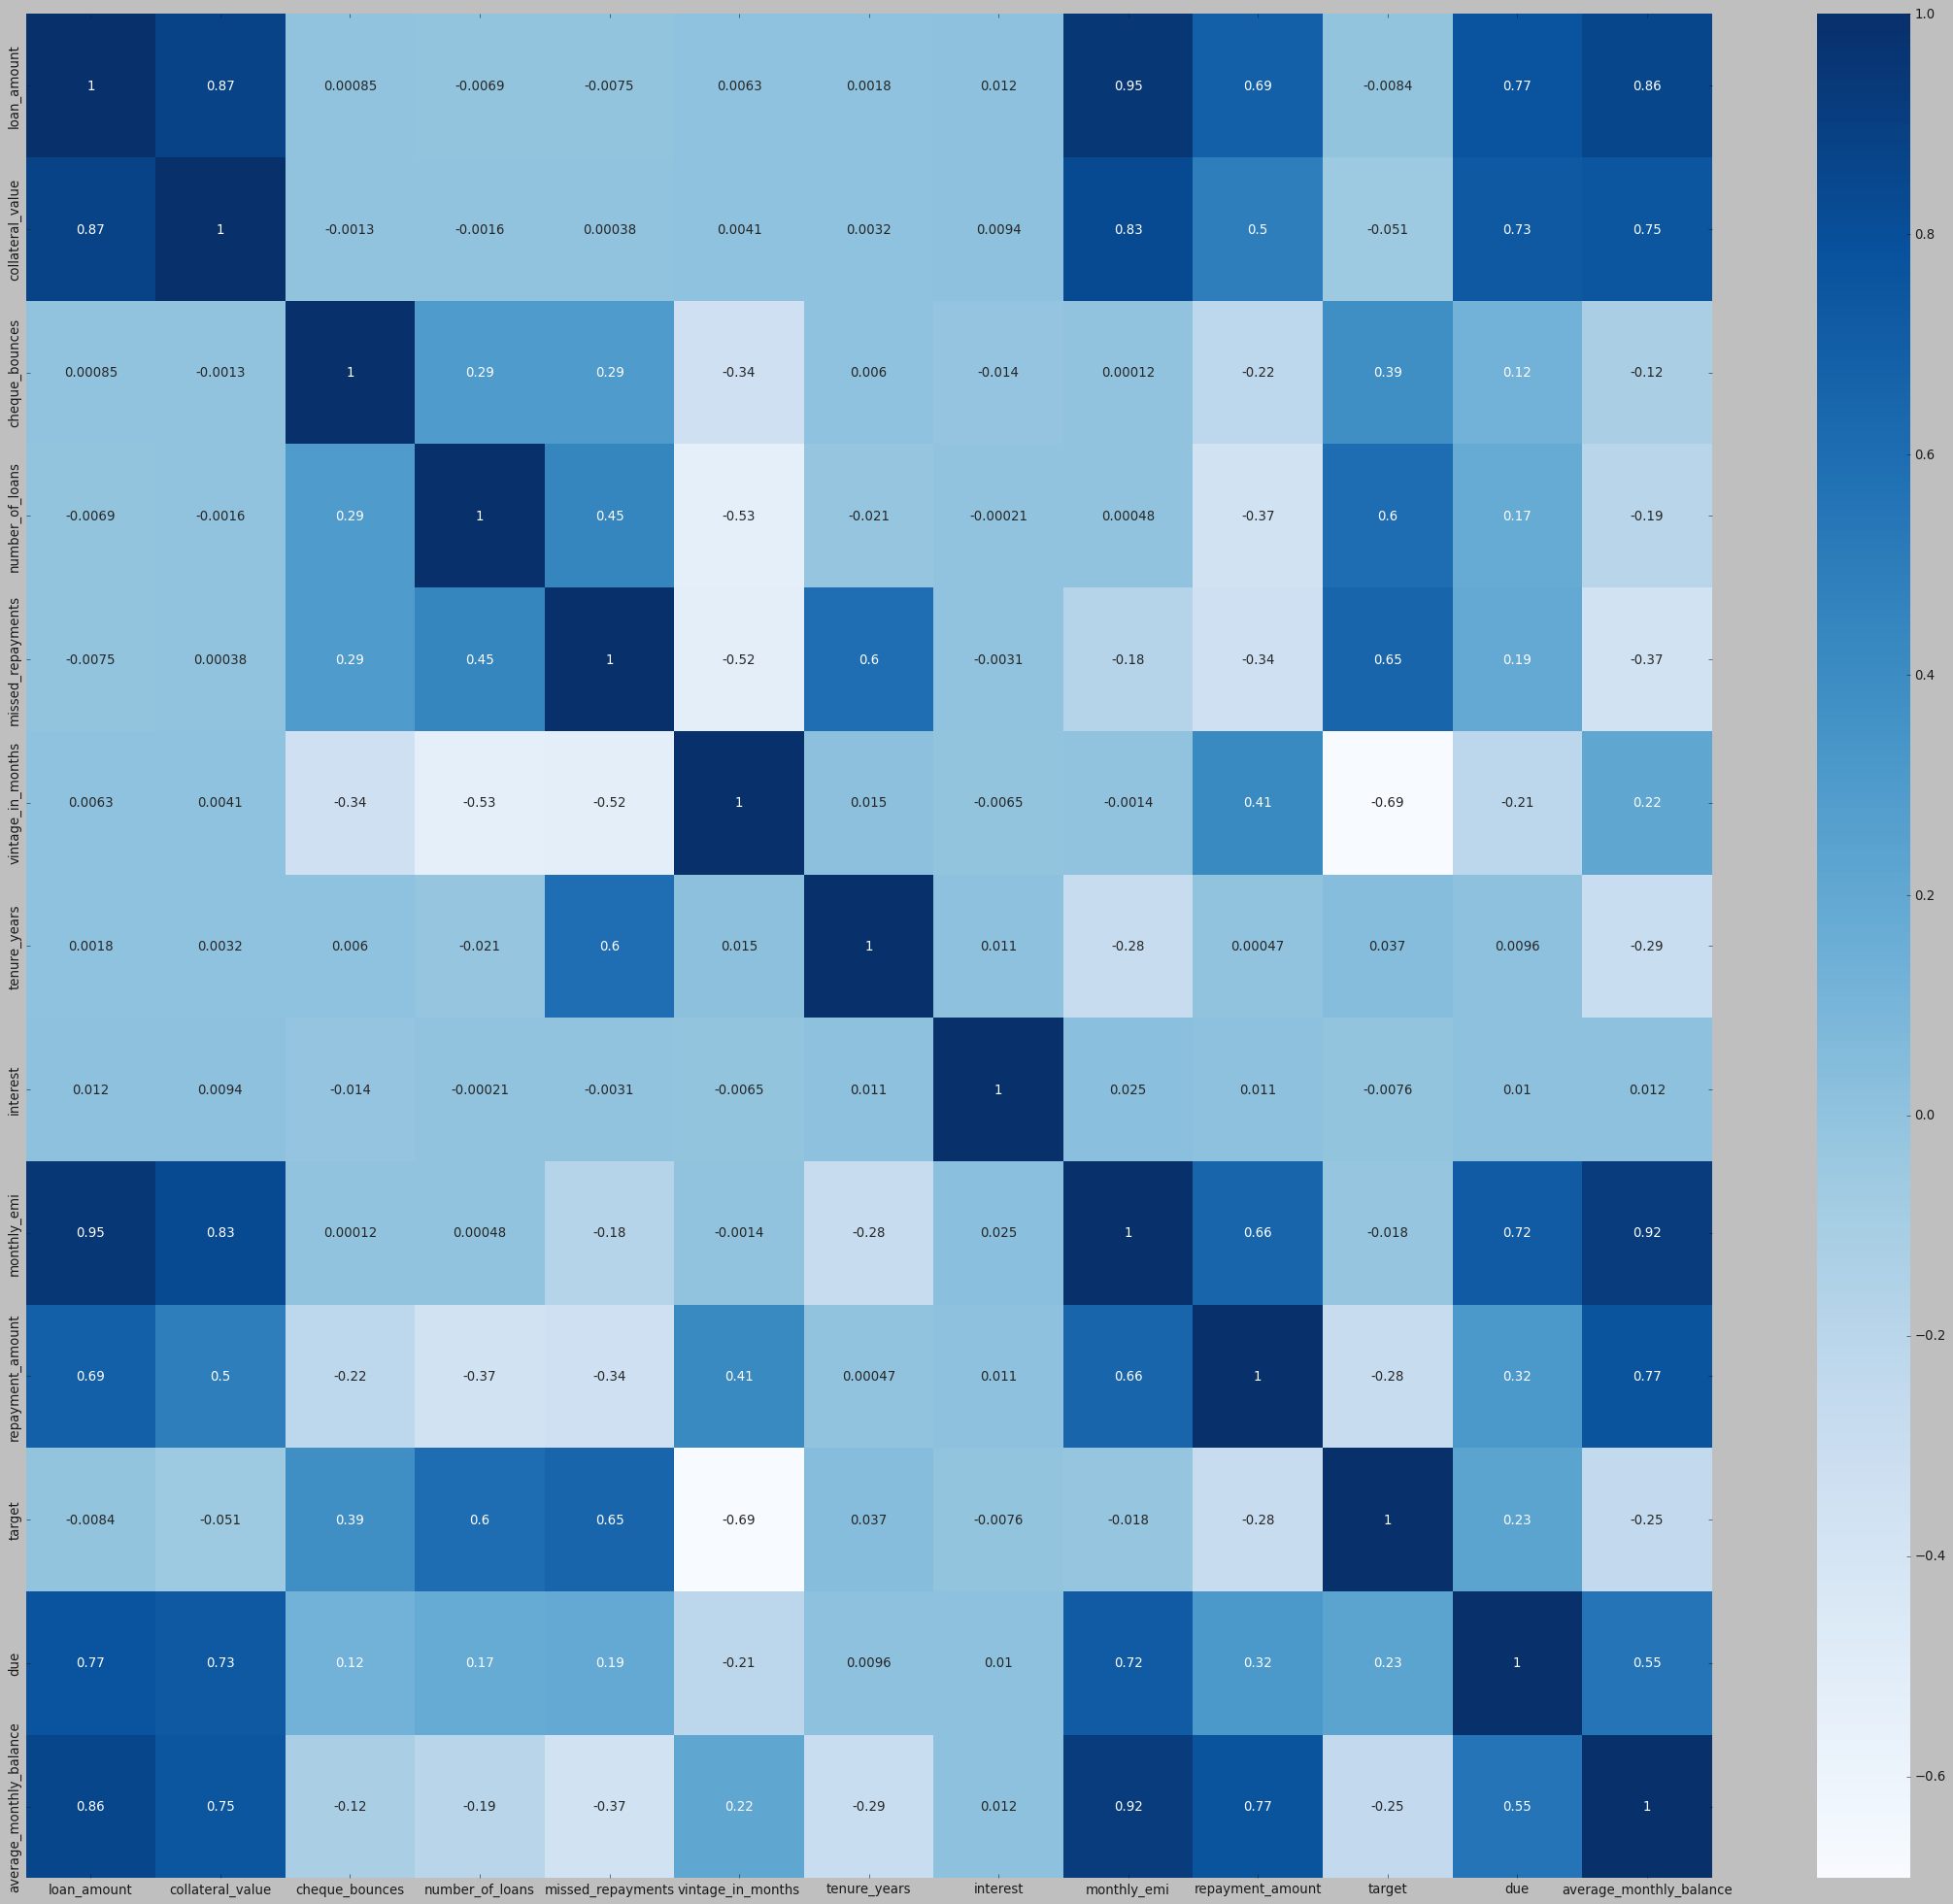

In [58]:
## correlation plot: heatmap
import seaborn as sns
plt.figure(figsize = (35,30))

corr= data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

In [59]:
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [60]:
curr_time= pd.to_datetime('now')

In [61]:
data['difference']= (curr_time-data['default_date'])/np.timedelta64(1, "D")

In [62]:
## dropping unnecessary coloumns for modell building
data= data.drop(['disbursal_date', 'default_date', 'loan_acc_num', 'customer_name', 'customer_address'],1)

In [63]:
## Encoding
encoded=pd.get_dummies(data['loan_type'], drop_first=True)

In [64]:
data=data.drop(['loan_type'], axis=1)

In [65]:
data= pd.concat([data,encoded], axis=1)

In [66]:
#downloading data to pycaret
data.to_csv("C:/Users/Pompy/OneDrive/Desktop/BFSI/pycaret_test.csv", index= False)

In [67]:
data.head()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance,difference,Consumer-Durable,Personal,Two-Wheeler
0,16.596229,6.332635,1.732051,1,2.236068,10.148892,1,12.1,6.942052,14.654516,0.455114,583200.95,5.462267,2913.605708,0,0,0
1,7.369125,4.708071,0.000000,3,5.099020,6.244998,5,12.2,2.803571,4.664718,0.791917,19522.35,2.078841,2232.605708,1,0,0
2,11.573656,6.080044,1.000000,2,0.000000,7.937254,1,13.9,5.149004,10.225819,0.421549,95847.48,4.993378,3589.605708,0,0,0
3,11.411658,7.663494,2.000000,3,3.464102,3.872983,2,12.5,4.573816,7.120991,0.768804,175217.42,3.755777,92.605708,0,0,1
4,5.692988,4.395989,1.000000,1,0.000000,12.328828,1,14.6,2.852422,5.093595,0.152124,2551.36,2.960315,925.605708,1,0,0


In [90]:
## Train-test split
from sklearn.model_selection import train_test_split
X= data.drop(columns=['target'])
X.fillna(0)
Y= data[['target']]
Y.fillna(0)
## Choose any random state
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=42)

In [91]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [92]:
##importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
## Using Recusrive Feature Elimination

In [98]:
Y_train.isnull().values.any()

False

In [104]:
X_train[np.isnan(X_train)] = 0

In [105]:
X_test[np.isnan(X_test)] = 0

In [107]:
## Running RFE with output number of variable equal to 10
lm= LinearRegression()
lm.fit(X_train, Y_train)
rfe=RFE(lm, n_features_to_select=10)
rfe= rfe.fit(X_train, Y_train)

In [108]:
from sklearn.linear_model import*
from sklearn import metrics
# Rsquared on test set
Y_pred_lr= rfe.predict(X_test)
metrics.r2_score(Y_test, Y_pred_lr)

0.7778527206275078

In [ ]:
## Using Multiple linear Regression

In [110]:
## Representing Linear regression as lr (creating linear Regression Object)
lm= LinearRegression()
lm.fit(X_train, Y_train)

## Rsquared on test set
Y_pred_lr=lm.predict(X_test)
metrics.r2_score(Y_test, Y_pred_lr)

0.7827178846776176

In [ ]:
## Using Random Forest Regressor

In [112]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor(bootstrap= True, n_estimators= 200, random_state=42, max_depth=4, max_features=None, min_samples_leaf=2)
rf_regressor.fit(X_train, Y_train)


RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [113]:
Y_pred_train= rf_regressor.predict(X_train)
print(r2_score(Y_train, Y_pred_train))

0.7538244103900318


In [114]:
Y_pred_test= rf_regressor.predict(X_test)
print(r2_score(Y_test, Y_pred_test))

0.750852438762172


In [ ]:
## Using Gradient Boosting Regression

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_params={'n_estimators' :500,
           "max_depth": 4,
           'min_samples_split': 4,
           'learning_rate': 0.01,
           'loss': 'ls'}

gbr= GradientBoostingRegressor (**gbr_params)

## Fit the model
gbr.fit(X_train, Y_train)
Y_pred= gbr.predict(X_test)
print('R squared : %.3f' %gbr.score (X_test, Y_test))

R squared : 0.899


In [118]:
Y_pred_train= gbr.predict(X_train)
print('R_squared in train set:' , r2_score(Y_train, Y_pred_train))

R_squared in train set: 0.9150185889021516


In [119]:
Y_pred_test= gbr.predict(X_test)
print('R_squared in test set:' , r2_score(Y_test, Y_pred_test))

R_squared in test set: 0.8989363541829739


[1.41649935e-05 9.91631161e-03 7.76380007e-03 9.55599963e-02
 2.19320912e-01 4.56525219e-01 5.57999854e-02 2.34527105e-05
 3.48366235e-03 1.10691075e-01 3.97215006e-02 1.17913921e-03
 7.80422782e-07 3.74095800e-24 0.00000000e+00 0.00000000e+00]


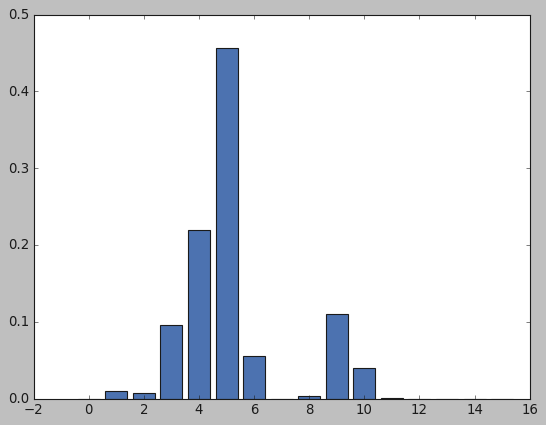

In [121]:
## Plot feature importance
#feature importance
print(gbr.feature_importances_)
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

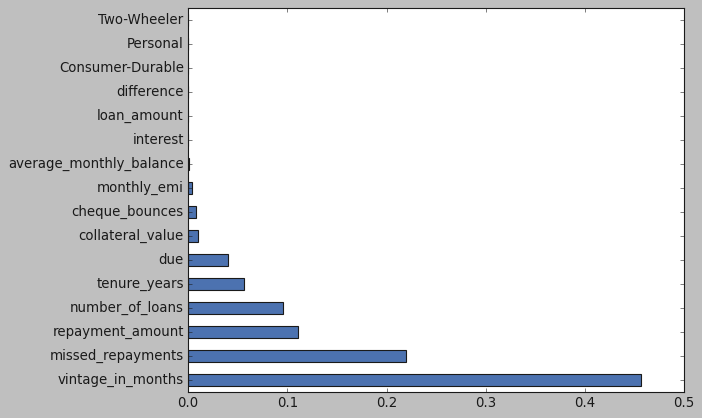

In [123]:
feat_importances= pd.Series(gbr.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')